In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mzn_bench as mb

import os

In [2]:
root = os.path.dirname(os.path.abspath("__file__"))
data = pd.read_csv(os.path.join(root, 'statistics.csv'))

In [3]:
# Split the 'configuration' column by '_' and expand the results into separate columns
splits = data['configuration'].str.split('_', expand=True)
# Rename the new columns to avoid ambiguity
splits.columns = ['case', 'solver', 'type']
# Append the new columns to the original dataframe
data = pd.concat([data, splits], axis=1)
data

,configuration,problem,model,data_file,status,time,flatBoolVars,flatBoolConstraints,evaluatedHalfReifiedConstraints,propagators,...,initTime,peakDepth,objective,variables,nodes,propagations,restarts,case,solver,type
0,MinDis_Gecode_Decomp,.,jobshop_gini.mzn,dzn/ta78_10a_alloc3.dzn,SATISFIED,605.828799,206560,105200,210660,NaN,...,NaN,NaN,1344.0,NaN,NaN,NaN,NaN,MinDis,Gecode,Decomp
1,Median_Gecode_Decomp,.,jobshop_gini.mzn,dzn/ta52_3a_alloc2.dzn,OPTIMAL_SOLUTION,37.142543,39957,20725,41507,63689.0,...,0.586221,743.0,-12057.0,43067.0,63617.0,1.121800e+08,0.0,Median,Gecode,Decomp
2,MinDis_Gecode_BB,.,jobshop_gini.mzn,dzn/ta62_5a_alloc1.dzn,SATISFIED,602.211245,53216,27600,55266,84824.0,...,0.784218,206.0,2025.0,57325.0,654021.0,2.752950e+09,0.0,MinDis,Gecode,BB
3,MaxEff_Gecode_Decomp,.,jobshop_gini.mzn,dzn/ta41_3a_alloc3.dzn,SATISFIED,600.882168,19908,10560,21138,32883.0,...,0.293577,377.0,-19444.0,22383.0,799625.0,5.500567e+09,0.0,MaxEff,Gecode,Decomp
4,Median_Gecode_Decomp,.,jobshop_gini.mzn,dzn/ta80_9a_alloc1.dzn,OPTIMAL_SOLUTION,296.955428,206571,105200,210671,319784.0,...,2.980570,1409.0,-10611.0,214793.0,114237.0,3.901835e+08,0.0,Median,Gecode,Decomp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,MinDis_Gecode_Decomp,.,jobshop_gini.mzn,dzn/ta74_7a_alloc3.dzn,SATISFIED,605.593760,206560,105200,210660,NaN,...,NaN,NaN,1884.0,NaN,NaN,NaN,NaN,MinDis,Gecode,Decomp
2876,MaxEff_Gecode_BB,.,jobshop_gini.mzn,dzn/ta62_3a_alloc3.dzn,UNKNOWN,602.102995,53216,27600,55266,84823.0,...,0.789402,50.0,NaN,57324.0,608933.0,2.571922e+09,0.0,MaxEff,Gecode,BB
2877,MinDis_Gecode_BB,.,jobshop_gini.mzn,dzn/ta55_3a_alloc2.dzn,SATISFIED,601.435239,39956,20725,41506,63687.0,...,0.522340,180.0,7.0,43063.0,934820.0,2.839526e+09,0.0,MinDis,Gecode,BB
2878,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta66_3a_alloc2.dzn,SATISFIED,602.047498,53217,27600,55267,84824.0,...,0.710362,318.0,-7005.0,57325.0,664861.0,2.769559e+09,0.0,Median,Gecode,BB


In [5]:
data[['case','solver','type']].head()

,case,solver,type
0,MinDis,Gecode,Decomp
1,Median,Gecode,Decomp
2,MinDis,Gecode,BB
3,MaxEff,Gecode,Decomp
4,Median,Gecode,Decomp


In [4]:
is_blackbox = data['type'] == 'BB'
is_decomp = data['type'] == 'Decomp'
is_mindis = data['case'] == 'MinDis'
is_median = data['case'] == 'Median'
is_maxeff = data['case'] == 'MaxEff'
blackbox = data[is_blackbox]
blackbox
# blackbox['type'] = 'blackbox'
# decomp = data[data['configuration'].str.contains('Decomp', case=False)][['data_file', 'time', 'objective']]
# decomp['type'] = 'decomp'
# results = pd.concat([blackbox, decomp], ignore_index=True)

,configuration,problem,model,data_file,status,time,flatBoolVars,flatBoolConstraints,evaluatedHalfReifiedConstraints,propagators,...,initTime,peakDepth,objective,variables,nodes,propagations,restarts,case,solver,type
2,MinDis_Gecode_BB,.,jobshop_gini.mzn,dzn/ta62_5a_alloc1.dzn,SATISFIED,602.211245,53216,27600,55266,84824.0,...,0.784218,206.0,2025.0,57325.0,654021.0,2.752950e+09,0.0,MinDis,Gecode,BB
6,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta49_2a_alloc2.dzn,SATISFIED,600.779777,19906,10560,21136,32872.0,...,0.268948,392.0,-9321.0,22373.0,1333235.0,4.339469e+09,0.0,Median,Gecode,BB
7,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta80_10a_alloc1.dzn,SATISFIED,606.004631,206561,105200,210661,NaN,...,NaN,NaN,-1102.0,NaN,NaN,NaN,NaN,Median,Gecode,BB
13,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta65_3a_alloc3.dzn,SATISFIED,602.024972,53218,27600,55268,84825.0,...,0.720014,299.0,-6083.0,57326.0,660125.0,2.757228e+09,0.0,Median,Gecode,BB
14,MaxEff_Gecode_BB,.,jobshop_gini.mzn,dzn/ta39_3a_alloc3.dzn,UNKNOWN,600.718123,14961,7935,15891,24703.0,...,0.218923,30.0,NaN,16829.0,1666420.0,3.981782e+09,0.0,MaxEff,Gecode,BB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,MinDis_Gecode_BB,.,jobshop_gini.mzn,dzn/ta80_7a_alloc1.dzn,SATISFIED,605.704160,206561,105200,210661,NaN,...,NaN,NaN,493.0,NaN,NaN,NaN,NaN,MinDis,Gecode,BB
2876,MaxEff_Gecode_BB,.,jobshop_gini.mzn,dzn/ta62_3a_alloc3.dzn,UNKNOWN,602.102995,53216,27600,55266,84823.0,...,0.789402,50.0,NaN,57324.0,608933.0,2.571922e+09,0.0,MaxEff,Gecode,BB
2877,MinDis_Gecode_BB,.,jobshop_gini.mzn,dzn/ta55_3a_alloc2.dzn,SATISFIED,601.435239,39956,20725,41506,63687.0,...,0.522340,180.0,7.0,43063.0,934820.0,2.839526e+09,0.0,MinDis,Gecode,BB
2878,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta66_3a_alloc2.dzn,SATISFIED,602.047498,53217,27600,55267,84824.0,...,0.710362,318.0,-7005.0,57325.0,664861.0,2.769559e+09,0.0,Median,Gecode,BB


In [26]:
def plot_blackbox_vs_decomp(df: pd.DataFrame, title: str):
    blackbox_data = df[is_blackbox].sort_values('time')
    decomp_data = df[is_decomp].sort_values('time')

    plt.figure(figsize=(10,6))
    plt.scatter(blackbox_data['time'], blackbox_data['objective'], color='blue', marker='o', label='BlackBox')
    plt.scatter(decomp_data['time'], decomp_data['objective'], color='orange', marker='o', label='Decomp')
    plt.xlabel('Time (s)')
    plt.ylabel('Objective')
    plt.title(title)
    plt.legend()
    plt.show()

/var/folders/3c/_zn7n8dj09vcvgfj2crht5l00000gn/T/ipykernel_60919/3267597599.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  blackbox_data = df[is_blackbox].sort_values('time')
/var/folders/3c/_zn7n8dj09vcvgfj2crht5l00000gn/T/ipykernel_60919/3267597599.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  decomp_data = df[is_decomp].sort_values('time')


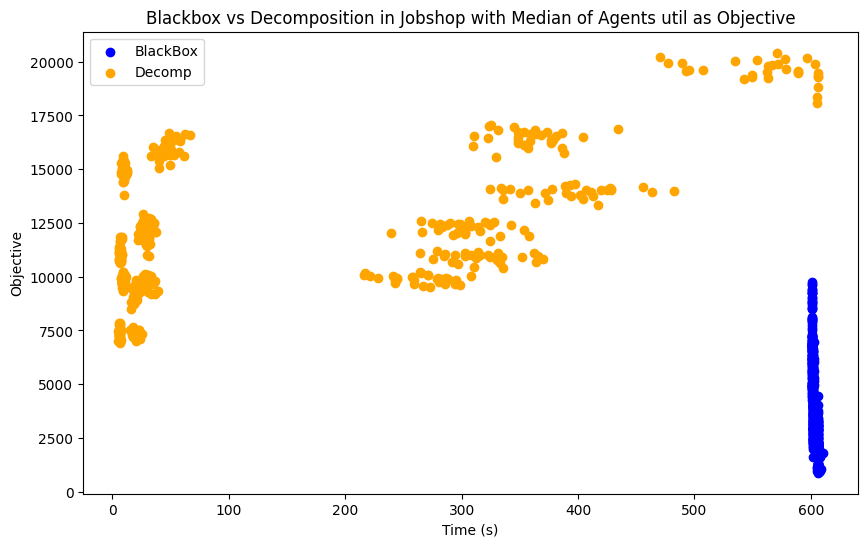

In [ ]:
# Filter and sort the data for each type
df = data[is_median][['time', 'objective', 'type']].copy()
df['objective'] = -df['objective'].astype(int) 
df = df[df['objective'] >= 0] # Remove outliers
title = 'Blackbox vs Decomposition in Jobshop with Median of Agents util as Objective'
plot_blackbox_vs_decomp(df, title)

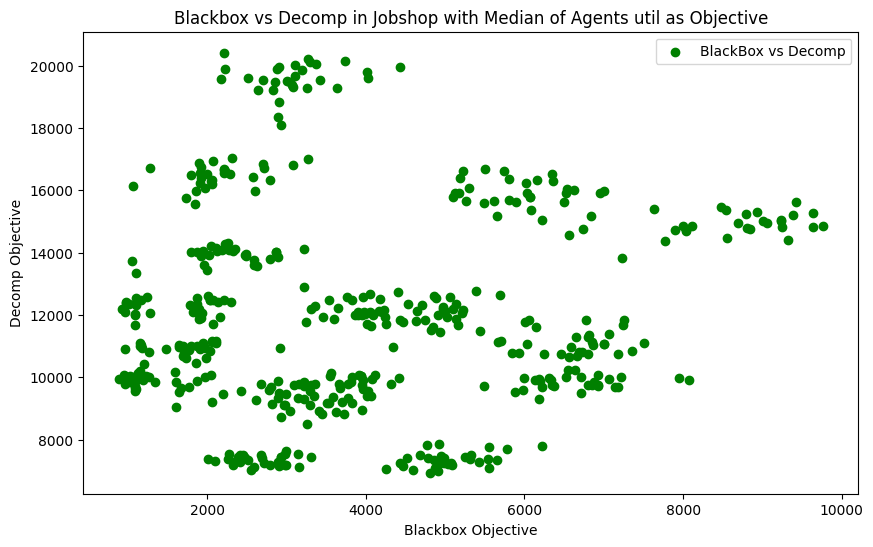

In [17]:
r = data[is_median][['data_file', 'objective', 'type']]
r['data_file'] = r['data_file'].str.replace('dzn/', '')
r['objective'] = -r['objective'].astype(int)
bb = r[r['type'] == 'BB']
decomp = r[r['type'] == 'Decomp']
r = pd.merge(left=bb, right=decomp, suffixes=('_bb', '_decomp'), on='data_file')
r
plt.figure(figsize=(10,6))
plt.scatter(r['objective_bb'], r['objective_decomp'], color='green', marker='o', label='BlackBox vs Decomp')
plt.xlabel('Blackbox Objective')
plt.ylabel('Decomp Objective')
plt.title('Blackbox vs Decomp in Jobshop with Median of Agents util as Objective')
plt.legend()
plt.show()


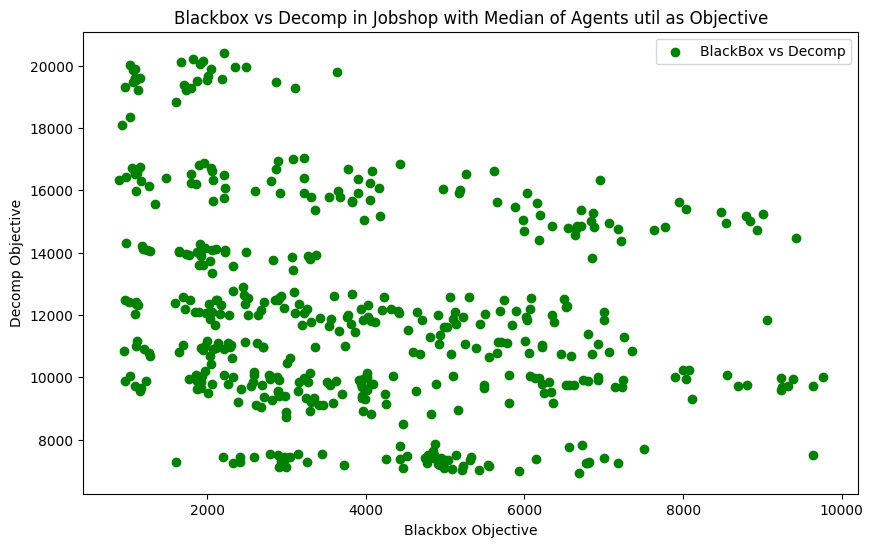

In [ ]:
r = data[is_median][['time', 'objective', 'type']].copy()
r['objective'] = -r['objective'].astype(int)
def plot_blackbox_vs_decomp_scatter(df: pd.DataFrame, title: str):
    blackbox_data = df[df['type'] == 'BB'].sort_values('time')
    decomp_data = df[df['type'] == 'Decomp'].sort_values('time')

    plt.figure(figsize=(10,6))
    plt.scatter(blackbox_data['objective'], decomp_data['objective'], color='green', marker='o', label='BlackBox vs Decomp')
    plt.xlabel('Blackbox Objective')
    plt.ylabel('Decomp Objective')
    plt.title(title)
    plt.legend()
    plt.show()

plot_blackbox_vs_decomp_scatter(r, 'Blackbox vs Decomp in Jobshop with Median of Agents util as Objective')